In [9]:
load('generate_curve.sage')

Searching for a 128-bit prime-order curve …
[SEA runs: 50, candidates tested: 50]
[SEA runs: 100, candidates tested: 100]
[SEA runs: 150, candidates tested: 150]
[SEA runs: 200, candidates tested: 200]
[SEA runs: 250, candidates tested: 250]
[SEA runs: 300, candidates tested: 300]
✔ Found curve after SEA runs: 340, candidates tested: 340
Generation complete in 79.82 s
Candidates tested: 340
SEA executions: 340
p  = 301614354725187938288361993394659882037
a  = 271925606500596991959692620589449881217
b  = 195738693441128771626048573332842844515
#E = 301614354725187938261103095999296392337
G  = (157306925343215743634909598646796425660, 286328150508100729483220428249978512997)


In [12]:
# Asume que generate_prime_order_curve está definido o importado

bit_sizes = [32, 40, 48]

# Diccionario para guardar resultados de cada bit-size
results = {}

for k in bit_sizes:
    print(f"\n=== Generando curva de {k} bits ===")
    E, G, candidates, sea_runs, gen_time = generate_prime_order_curve(k)
    # Parámetros de la curva
    p = E.base_field().order()
    a = E.a4()
    b = E.a6()
    n = E.cardinality()
    # Guardar todo en el diccionario
    results[k] = {
        'E': E,
        'G': G,
        'p': p,
        'a': a,
        'b': b,
        'n': n,
        'candidates': candidates,
        'sea_runs': sea_runs,
        'gen_time': gen_time
    }
    # Mostrar en consola
    print(f"Campo p = {p}")
    print(f"  ecuación: y^2 = x^3 + ({a})·x + ({b})  (mod p)")
    print(f"  #E = {n}")
    print(f"  G = {G}")
    print(f"  • Pares (a,b) probados: {candidates}")
    print(f"  • Ejecuciones SEA:      {sea_runs}")
    print(f"  • Tiempo total:         {gen_time:.2f} s")


=== Generando curva de 32 bits ===
✔ Found curve after SEA runs: 43, candidates tested: 43
Campo p = 2786035199
  ecuación: y^2 = x^3 + (51016516)·x + (2185363664)  (mod p)
  #E = 2786064251
  G = (672793040 : 2269103569 : 1)
  • Pares (a,b) probados: 43
  • Ejecuciones SEA:      43
  • Tiempo total:         0.06 s

=== Generando curva de 40 bits ===
[SEA runs: 50, candidates tested: 50]
✔ Found curve after SEA runs: 50, candidates tested: 50
Campo p = 696676849667
  ecuación: y^2 = x^3 + (117510864672)·x + (608566364394)  (mod p)
  #E = 696677404117
  G = (74126815521 : 235474348420 : 1)
  • Pares (a,b) probados: 50
  • Ejecuciones SEA:      50
  • Tiempo total:         0.07 s

=== Generando curva de 48 bits ===
[SEA runs: 50, candidates tested: 50]
✔ Found curve after SEA runs: 84, candidates tested: 84
Campo p = 183697331409577
  ecuación: y^2 = x^3 + (179954138900895)·x + (45849564335211)  (mod p)
  #E = 183697308090533
  G = (132020972057916 : 50122718111061 : 1)
  • Pares (a,b) 

Saved plot to curve_32bit.png


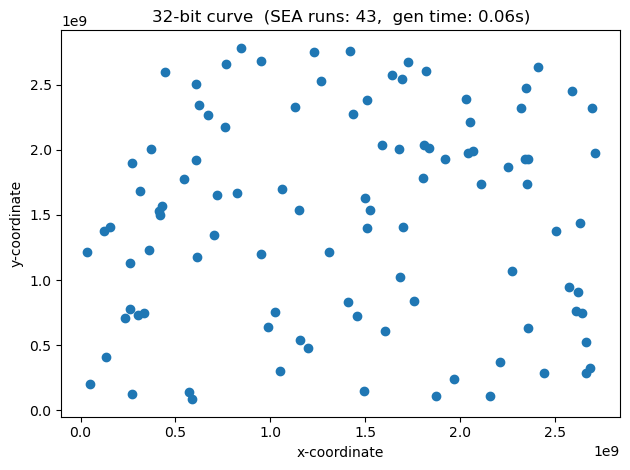

Saved plot to curve_40bit.png


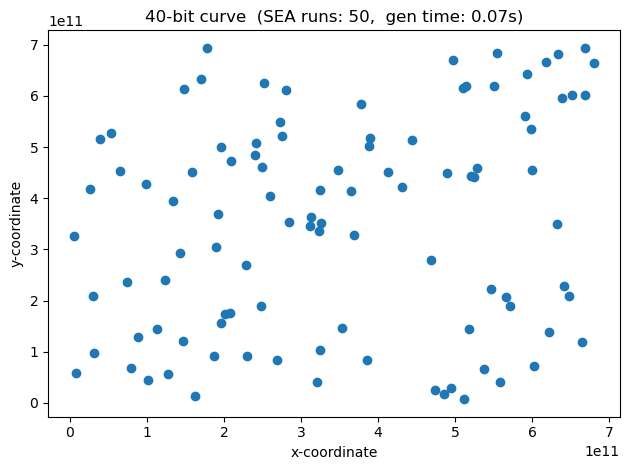

Saved plot to curve_48bit.png


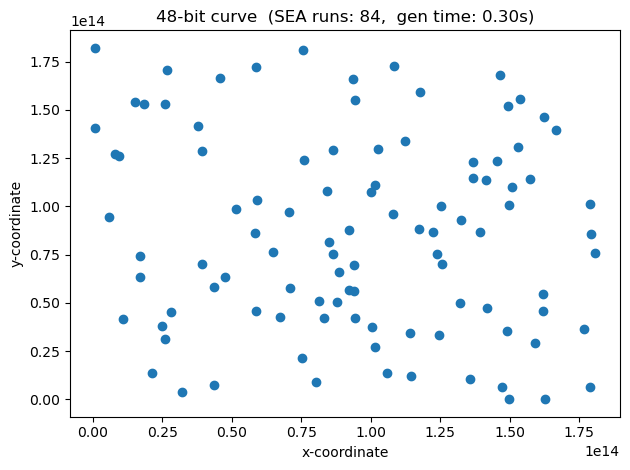

In [17]:
# Asume que ya has ejecutado el bloque que genera `results` para k = 32, 40, 48
import matplotlib.pyplot as plt

# Para cada tamaño de curva, dibuja los primeros 100 puntos (múltiplos de G)
for k, data in results.items():
    E        = data['E']
    G        = data['G']
    sea_runs = data['sea_runs']
    gen_time = data['gen_time']
    
    # Calculamos los primeros 30 puntos: G, 2G, ..., 30G
    pts = [i * G for i in range(1, 101)]
    xs  = [int(pt.xy()[0]) for pt in pts]
    ys  = [int(pt.xy()[1]) for pt in pts]
    
    plt.figure()
    plt.scatter(xs, ys)
    plt.title(f"{k}-bit curve  (SEA runs: {sea_runs},  gen time: {gen_time:.2f}s)")
    plt.xlabel("x-coordinate")
    plt.ylabel("y-coordinate")
    plt.tight_layout()
    # Guarda la figura antes de mostrarla
    filename = f"curve_{k}bit.png"
    plt.savefig(filename, dpi=300)    # o .pdf, .svg, etc.
    print(f"Saved plot to {filename}")
    plt.show()


In [19]:
import json

# Prepara una versión JSON-serializable
serializable = {}
for k, data in results.items():
    key = str(int(k))       # convierte la clave a str
    serializable[key] = {
        'p':               int(data['p']),
        'a':               int(data['a']),
        'b':               int(data['b']),
        'n':               int(data['n']),
        'G_xy':            (int(data['G'].xy()[0]), int(data['G'].xy()[1])),
        'candidates':      int(data['candidates']),
        'sea_runs':        int(data['sea_runs']),
        'gen_time':        float(data['gen_time']),
    }

# Guarda en JSON con indent=2 (entero de Python)
with open('results.json', 'w') as f:
    json.dump(serializable, f, indent=2)

print("Resultados serializados en results.json")


Resultados serializados en results.json
